# Importing Libraries and data set

In [50]:
# Importing Libraries and Modules
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [51]:
# The code below will configure the API key from quandl
quandl.ApiConfig.api_key = 'xwBFYjwbmYrutynEZ-ZD'

In [52]:
# The code below will import the data from the OPEC crude oil price.
opec_data = quandl.get('OPEC/ORB')

In [53]:
opec_data.head(10)

,Value
Date,
2003-01-02,30.05
2003-01-03,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86
2003-01-09,29.51
2003-01-10,29.82
2003-01-13,29.82
2003-01-14,30.21


In [54]:
opec_data.shape

(4815, 1)

In [55]:
opec_data.columns

Index(['Value'], dtype='object')

In [56]:
type(opec_data)

pandas.core.frame.DataFrame

In [57]:
# The code below will check for missing value in the data
opec_data.isnull().sum()

Value    0
dtype: int64

In [58]:
# The code below will check for duplicates in the data
opec_data_dup = opec_data[opec_data.duplicated()]
opec_data_dup

,Value
Date,
2003-01-13,29.82
2003-01-31,30.71
2003-05-09,25.14
2003-05-16,26.24
2003-05-21,26.64
...,...
2021-08-19,66.08
2021-08-20,66.13
2021-08-24,69.71


### For the above duplicates values, I have to mentioned that they are not realy duplicates since the values may have been identical, but the date are different.

In [59]:
# the code below will reset the index
opec_data_index = opec_data.reset_index()

In [61]:
opec_data_index.head()

,Date,Value
0,2003-01-02,30.05
1,2003-01-03,30.83
2,2003-01-06,30.71
3,2003-01-07,29.72
4,2003-01-08,28.86


In [62]:
# The code below will help change the 'date' variable as 'datetime' variable and set it as an index. 
from datetime import datetime

opec_data_index['datetime'] = pd.to_datetime(opec_data_index['Date']) 
opec_data_index = opec_data_index.set_index('datetime') 
opec_data_index.drop(['Date'], axis=1, inplace=True) 
opec_data_index.head()

,Value
datetime,
2003-01-02,30.05
2003-01-03,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86


# Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.

## In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.

## Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

### For the data on OPEC oil price I didn't need to subset the data because the historical events in the data was relevant and in a resonable time frame. The data covers the years from december 2002 to september 2021, hence the whole data would be used for the times serie analysis. 

# Create a line chart of your data.

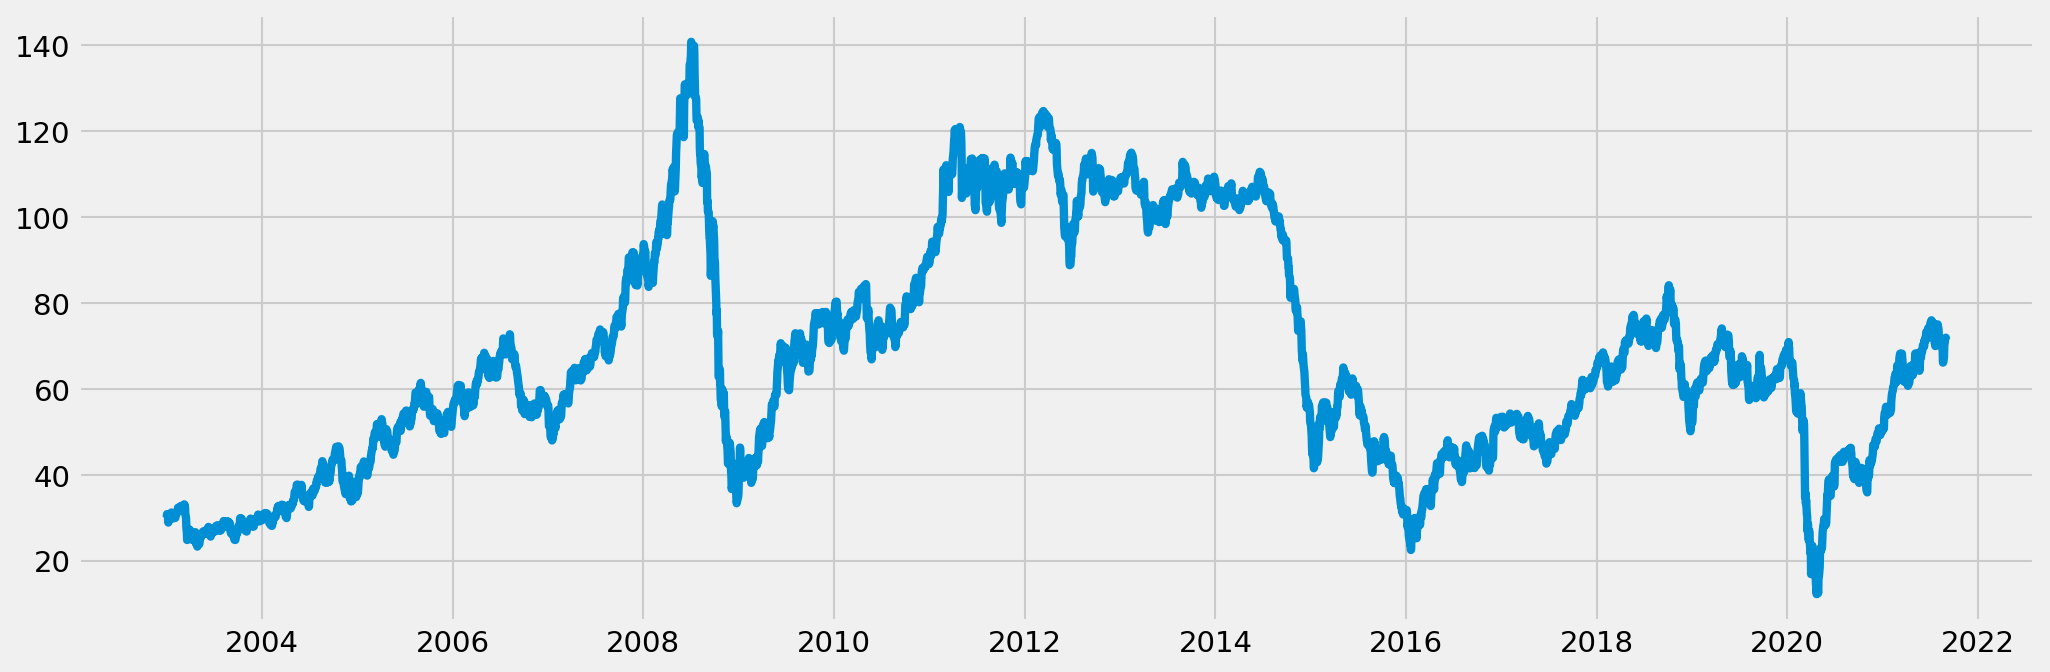

In [78]:
# The code below will help plot the data using a matplotlib line chart.
plt.figure(figsize=(15,5), dpi=150)
plt.plot(opec_data_index)

# Decompose the data’s components and analyze the results from the plot in a markdown cell.

In [151]:
# The codes below will decompose the data using an additive model due to the linearity of the data.
decomposition = sm.tsa.seasonal_decompose(opec_data_index, model='additive', freq= 1)

In [152]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

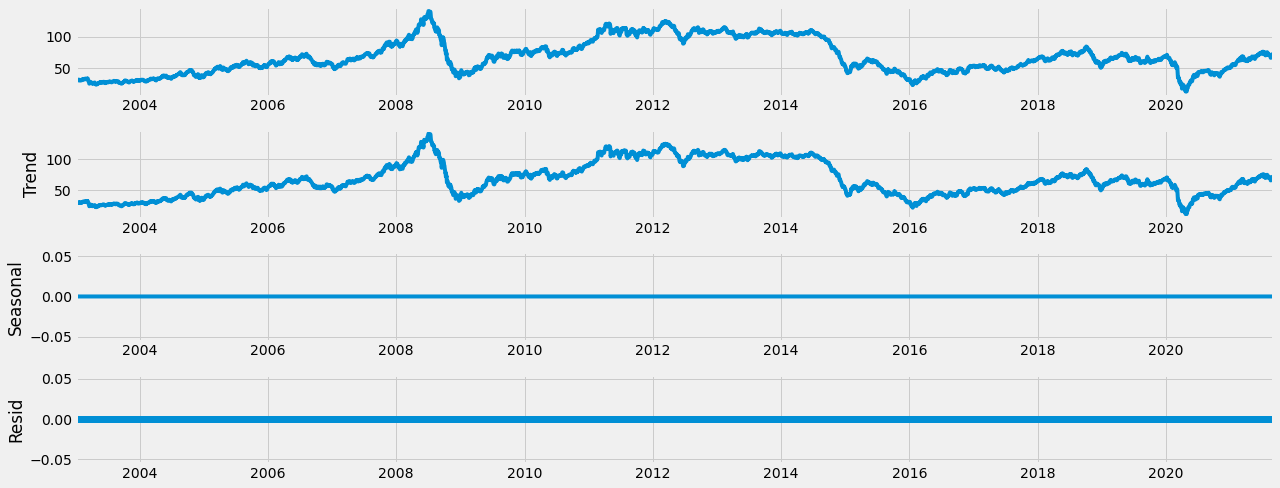

In [153]:
decomposition.plot()
plt.show()

### From the plot above we can see that the level line, which correspond to the original data, and the trend line are identical. That is an indication that the data doesn't have much noise and doesnt need to bee smooth. The seasonal line is flat, which is an indication that there is no seasonality in the data. The residual line, which is the what is leeft after the trend and seasonality have been extracted, is also pretty flat.

# Conduct a Dickey-Fuller test to check for stationarity and Interpret the results in a markdown cell and reference your null hypothesis.

In [155]:
# The code below will help define stationarity.
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(opec_data_index['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.296266
p-value                           0.173175
Number of Lags Used              14.000000
Number of Observations Used    4800.000000
Critical Value (1%)              -3.431713
Critical Value (5%)              -2.862142
Critical Value (10%)             -2.567091
dtype: float64


### The null hypothesis would be the presence of a unit root, and we are trying to disprove that fact. We can see that test statistic is -2.296266, thee p-value is 0.173175, and the critical value at 5% and 10% respectively are -2.862142 and -2.567091. To start, we can see that the p-value is well above the recommended 0.05, which is already an indication that it is not significant. next, we will compare the test statistic and the critical value. The test statistic is larger than the critical value at 5 and 10% respectively, which means that we can't reject the null hypothesis. By not be able to reject the null hypothesis, that means that there is unit root in the data and the data is non-stationary.

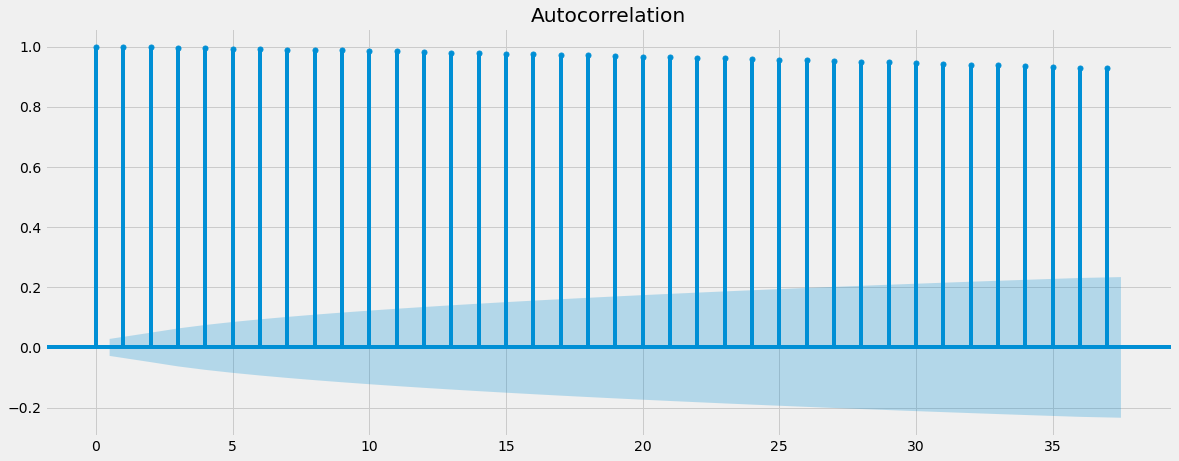

In [156]:
# The code below will check for autocorrelations by ploting the data.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(opec_data_index)
plt.show()

# # If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [157]:
# The code below will stationirized the opec data
opec_diff = opec_data_index - opec_data_index.shift(1)

In [158]:
opec_diff.dropna(inplace = True)

In [159]:
dickey_fuller(opec_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.597726e+01
p-value                        6.898411e-29
Number of Lags Used            1.300000e+01
Number of Observations Used    4.800000e+03
Critical Value (1%)           -3.431713e+00
Critical Value (5%)           -2.862142e+00
Critical Value (10%)          -2.567091e+00
dtype: float64


### Now we can see that the test stat

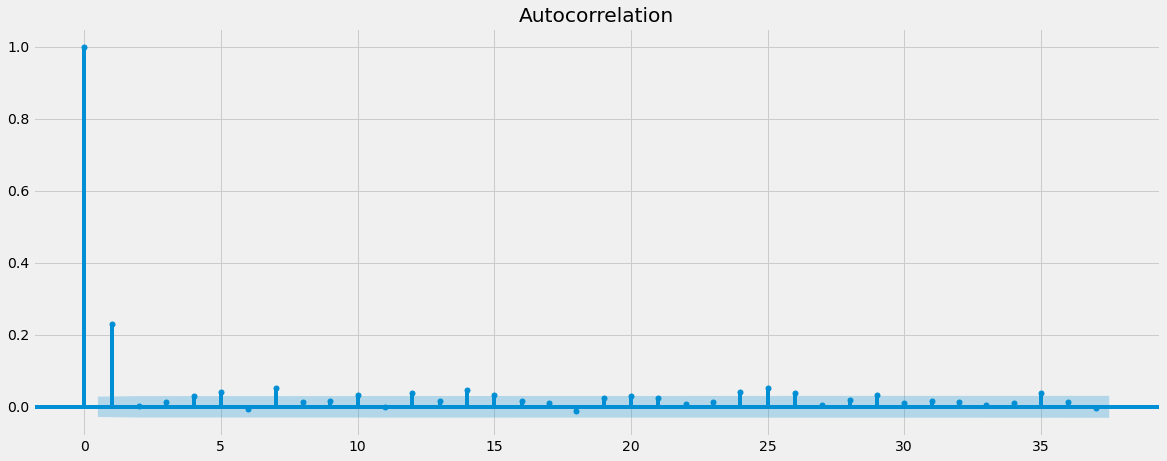

In [160]:
plot_acf(opec_diff)
plt.show()